### Explore some of the commonly used probabilty distribution model.
- We will learn how to generate data that follows specific probability distributions.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from scipy.special import erfinv
from scipy.stats import uniform, binom, norm

A random variable X is a fucntion that represent a random phenomenon, meaning its exact value cannot be determined.

A random varibale is associated with a function called probability density function (pdf), which encodes the probability of the random variable falling within a given range. 
- In other words, if X is a continuos random varible and f is its pdf, then:
    - P(a<=X<=b) = Area of f between a and b
- In the discrete case, 
    - P(X=a) = f(a)

Another function associated with a random variable is the cummulative distribution function(cdf), denoted as F
- It represents the probability that a random variable X will be less than or equal to x for x in any realnumber
    - F(x) := P(X<=x)

We can generate synthetic data with any desired distribution, given that we know F. The process is as follows:
- Generate a random value y uniformly from the interval [0,1]
- Compute the F^-1(y), which is the inverse function of F evaluated at y.


*Code for a random generator for each of the above distribution*

#### Example 1: Uniform Generator

In [65]:
def uniform_generator(a,b,num_sample=100):
    #Generates an array of uniformly distributed random numbers within the given range
    np.random.seed(42)
    
    array = np.random.uniform(a,b,num_sample)
    
    return array
print(f" 6 Randomly generated value [0,1]: {np.array2string(uniform_generator(0,1,6),precision=3)}")
print(f" 50 Randomly generated value [10,100]: {np.array2string(uniform_generator(10,100,50),precision=3)}")


 6 Randomly generated value [0,1]: [0.375 0.951 0.732 0.599 0.156 0.156]
 50 Randomly generated value [10,100]: [43.709 95.564 75.879 63.879 24.042 24.04  15.228 87.956 64.1   73.727
 11.853 97.292 84.92  29.111 26.364 26.506 37.382 57.228 48.875 36.211
 65.067 22.554 36.293 42.973 51.046 80.666 27.971 56.281 63.317 14.181
 64.679 25.347 15.855 95.4   96.907 82.756 37.415 18.79  71.581 49.614
 20.983 54.566 13.095 91.839 33.29  69.627 38.054 56.806 59.204 26.637]


#### Example 2: Gaussian Generator

- In the gaussian distribution, the closed formula uses a function called the Gaussian error function denoted as erf(x)
- scipy.special.erf and scipy.special.erfinv to compute the erf function and its inverse.

In [86]:
def plot_gaussian_distributions(*gaussian):
    fig, ax = plt.subplots(1, 1, figsize=(10, 4))
    for i in range(len(gaussian)):
        ax.hist(gaussian[i], alpha=0.5, label="gaussian_0", bins=32)
    ax.set_title("Histograms of Gaussian distributions")
    ax.set_xlabel("Values")
    ax.set_ylabel("Frequencies")
    ax.legend()
    plt.show()
    
    
def plot_binomial_distributions(*binomial):
    fig, ax = plt.subplots(1, 1, figsize=(10, 4))
    for i in range(len(binomial)):
        ax.hist(binomial[i], alpha=0.5, label="binomial_0")
    ax.set_title("Histograms of Binomial distributions")
    ax.set_xlabel("Values")
    ax.set_ylabel("Frequencies")
    ax.legend()
    plt.show()

In [73]:
def inverse_cdf_gaussian(y, mu, sigma):
    # Calculates the inverse cumulative distribution function of a Gaussian function.
    x = mu + erfinv(2*y - 1) * sigma*(2**0.5)
    return x

print(f"Inverse of Gaussian CDF with mu {15} and sigma {5} for value {1e-10}: {inverse_cdf_gaussian(1e-10,15,5):.3f}")
print(f"Inverse of Gaussian CDF with mu {15} and sigma {5} for value {1}: {inverse_cdf_gaussian(1,15,5):.3f}")
print(f"Inverse of Gaussian CDF with mu {15} and sigma {5} for value {0}: {inverse_cdf_gaussian(0,15,5):.3f}")


Inverse of Gaussian CDF with mu 15 and sigma 5 for value 1e-10: -16.807
Inverse of Gaussian CDF with mu 15 and sigma 5 for value 1: inf
Inverse of Gaussian CDF with mu 15 and sigma 5 for value 0: -inf


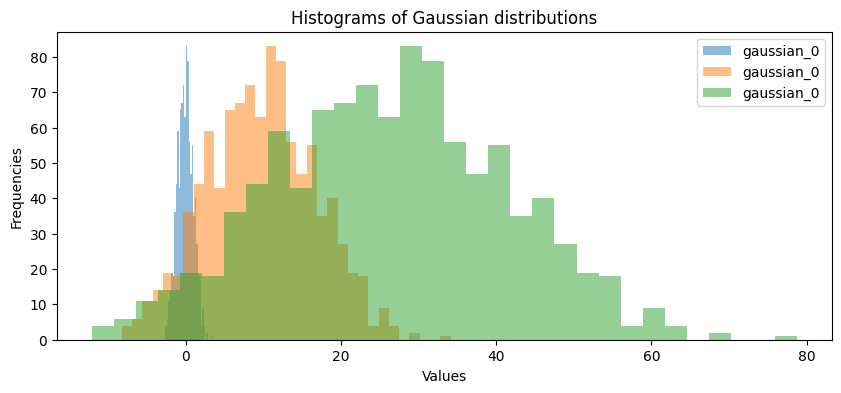

In [85]:
def gaussian_generator(mu, sigma, num_samples):
    u = uniform_generator(0,1,num_samples)
    array = inverse_cdf_gaussian(u, mu, sigma)
    return array 

gaussian_0 = gaussian_generator(0,1,1000)
gaussian_1 = gaussian_generator(10,7,1000)
gaussian_2 = gaussian_generator(27,15,1000)

plot_gaussian_distributions(gaussian_0,gaussian_1,gaussian_2)


#### Example - 3 Binomial Generator

In [93]:
def inverse_cdf_binomial(y,n,p):
    """Calculate the inverse cumulative distribution function of a binomial distribution

    Args:
        y (float or np.ndarray): The probability or array of probabilities
        n (int): The number of trials in the binomial distribution
        p (float): The probability of success in each trail
    """
    
    x = binom.ppf(y,n,p)
    return x

def binomial_generator(n,p,num_samples):
    u = uniform_generator(0,1,num_samples)
    array = inverse_cdf_binomial(u,n,p)
    return array


In [94]:
print(f"Inverse of Binomial CDF with n {15} and p {0.9} for value {1e-10}: {inverse_cdf_binomial(1e-10, 15, 0.9):.3f}")
print(f"Inverse of Binomial CDF with n {15} and p {0.5} for value {0}: {inverse_cdf_binomial(0, 15, 0.5)}")
print(f"Inverse of Binomial CDF with n {20} and p {0.2} for value {0.4}: {inverse_cdf_binomial(0.4, 20, 0.2):.3f}")


Inverse of Binomial CDF with n 15 and p 0.9 for value 1e-10: 3.000
Inverse of Binomial CDF with n 15 and p 0.5 for value 0: -1.0
Inverse of Binomial CDF with n 20 and p 0.2 for value 0.4: 3.000


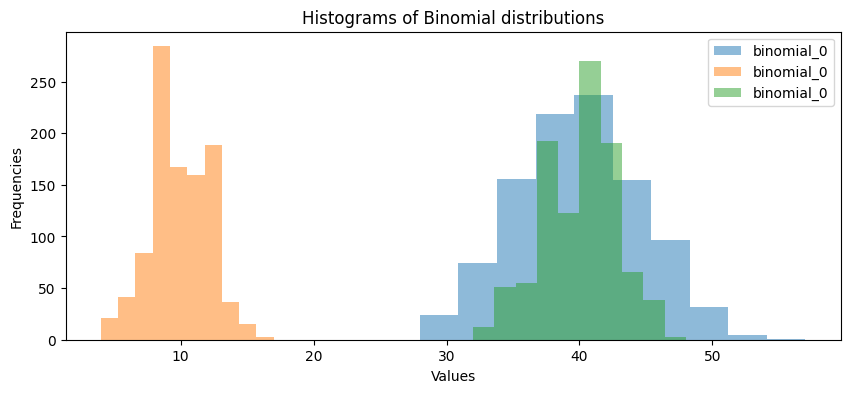

In [96]:
binomial_0 = binomial_generator(100, 0.4, 1000)
binomial_1 = binomial_generator(20, 0.5, 1000)
binomial_2 = binomial_generator(50, 0.8, 1000)

plot_binomial_distributions(binomial_0, binomial_1, binomial_2)